<a href="https://colab.research.google.com/github/asmaumer/Kmeans-on-iris-data/blob/main/Beginner_task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

In [ ]:
#reading the csv file

iris = pd.read_csv("/content/Iris.csv")
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


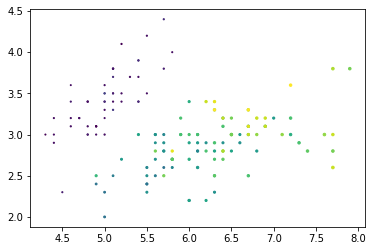

In [72]:
#plotting the data


plt.scatter(iris['SepalLengthCm'],iris['SepalWidthCm'], iris['PetalLengthCm'], iris['PetalWidthCm'])


(-1.0, 295291.1421678851)

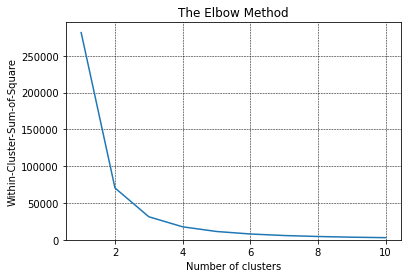

In [74]:
#To find the optimal number of clusters for k-means

#Selecting the features
x = iris.iloc[:, 0:3].values

#WCSS meathod
WCSS = []

for i in range(1,11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                  max_iter = 300, n_init = 10, random_state = 0)
  kmeans.fit(x)
  WCSS.append(kmeans.inertia_)

# Plotting the results onto a line graph
number_clusters = range(1,11)
plt.plot(number_clusters,WCSS)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-Cluster-Sum-of-Square')
plt.grid(color = 'black', linestyle = '--', linewidth = 0.5)
plt.ylim(bottom=-1)

We can observe from the graph that the no. of optimal clusters would be "3" as the WCSS does not significantly decrease after that.

In [ ]:
#Now applying kmeans to the dataset 
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)

#Creating the kmeans classifier
y_kmeans = kmeans.fit_predict(x)

(4.12, 8.5)

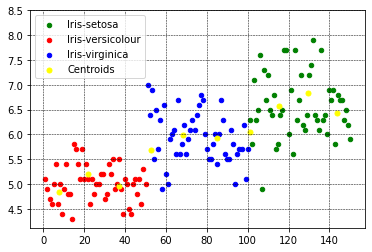

In [73]:
#Visualizing the clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 20, c = 'green', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 20, c = 'red', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 20, c= 'blue', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 25, c = 'yellow', label = 'Centroids')


plt.legend()
plt.grid(color = 'black', linestyle = '--', linewidth = 0.5)
plt.ylim(top=8.5)